<a href="https://colab.research.google.com/github/nehaal10/Wine_quality_estimator/blob/main/Wine_Quality_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Dataset/winequality-red.csv')

In [ ]:
df_train.head(60)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

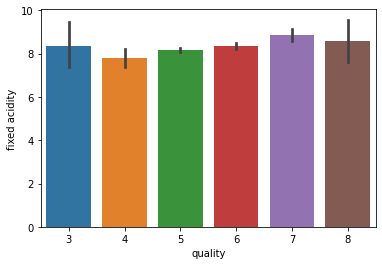

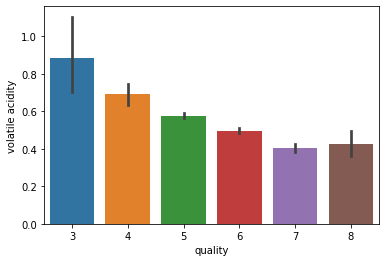

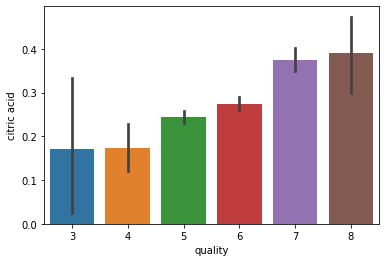

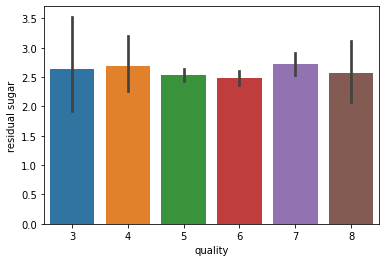

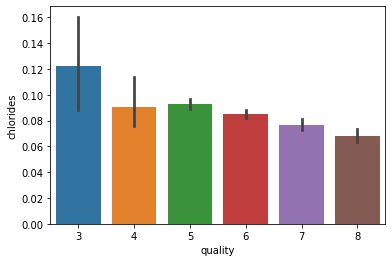

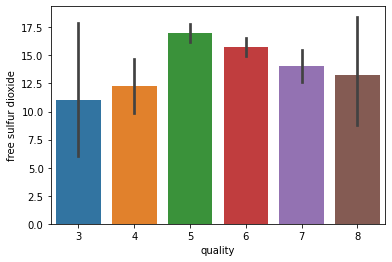

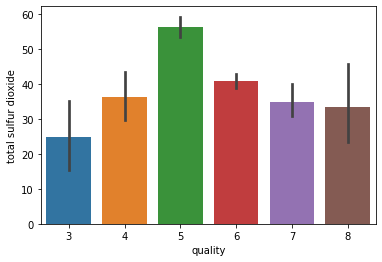

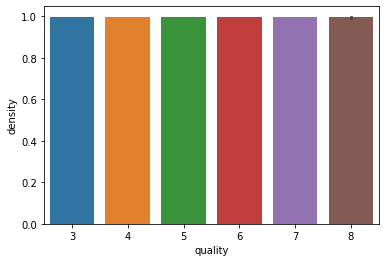

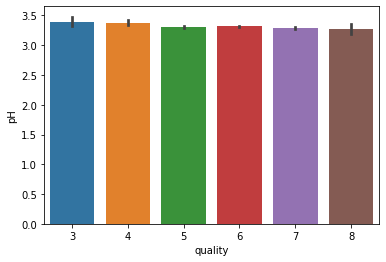

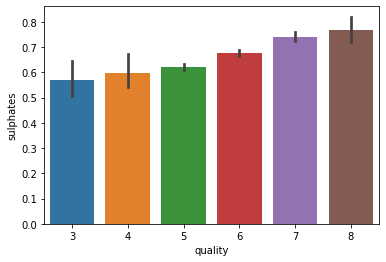

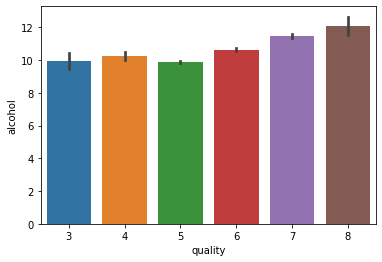

In [ ]:
col=list(df_train.columns[:-1])
for i in range(len(col)):
    plt.figure(i)
    sns.barplot(x='quality',y=col[i],data=df_train)

<Figure size 432x288 with 0 Axes>

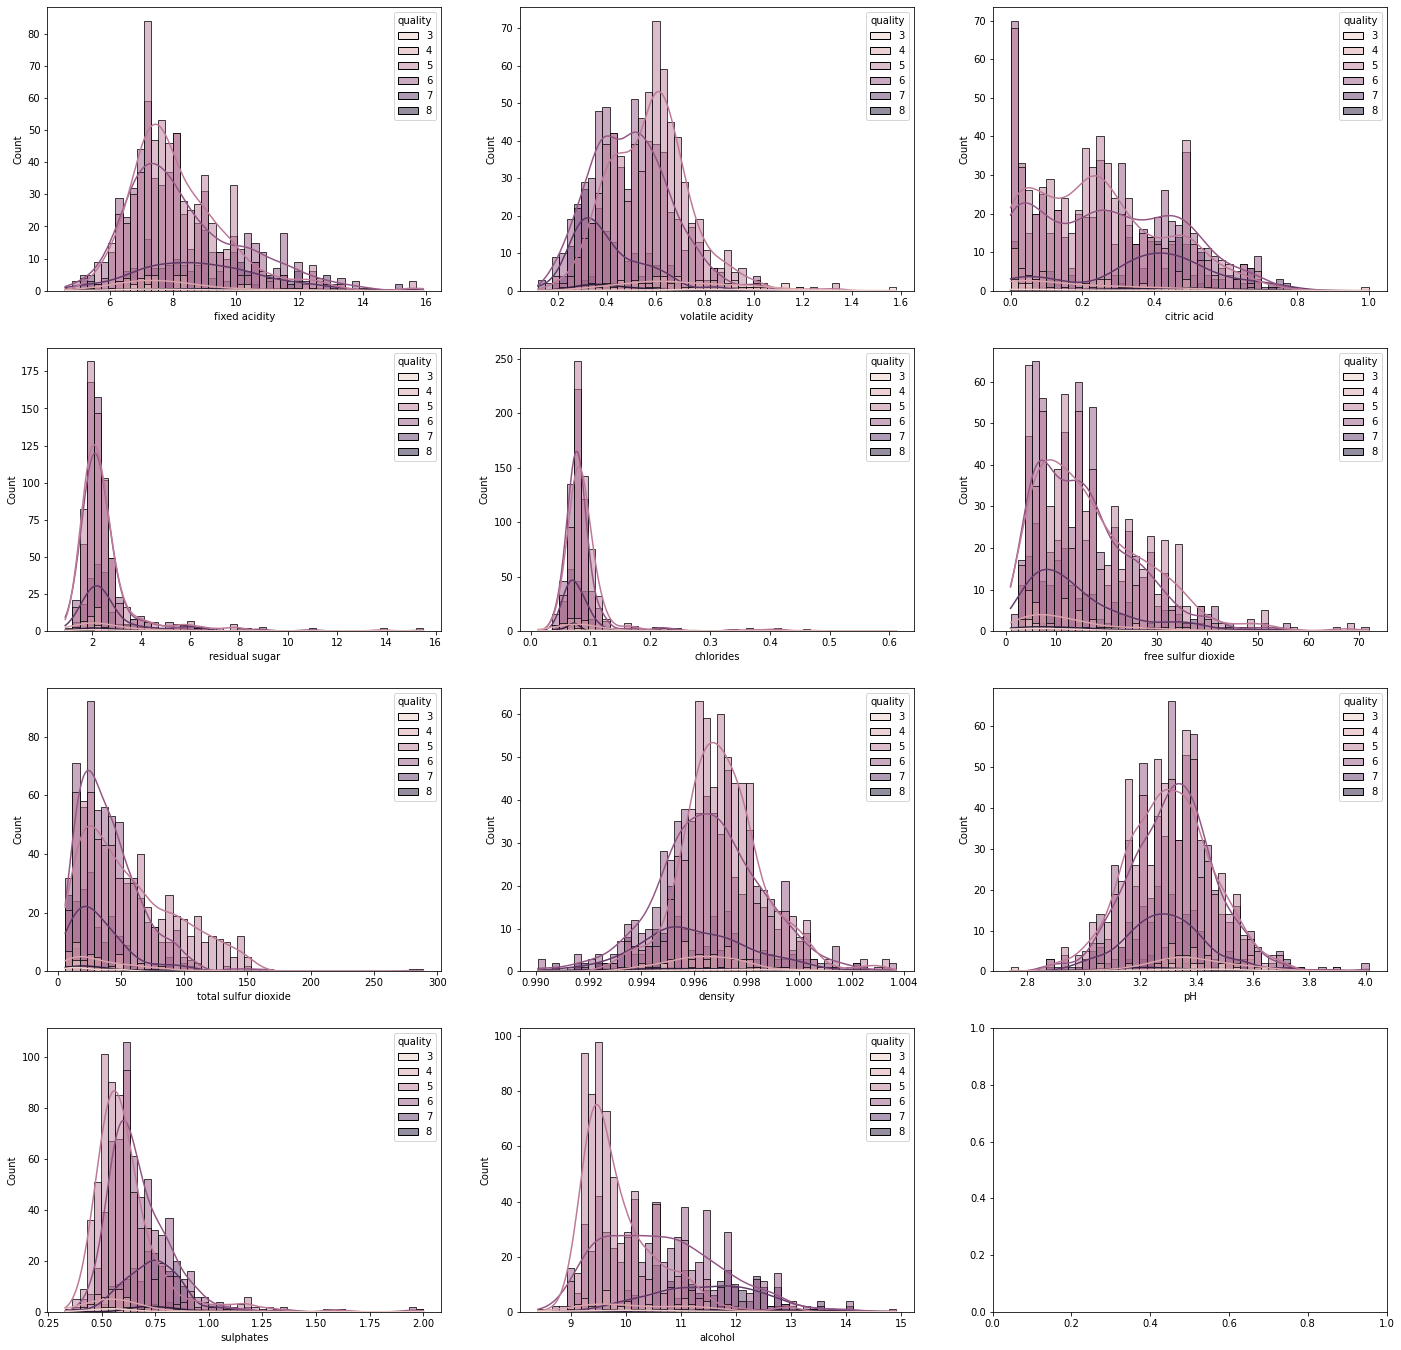

In [ ]:
all_columns=list(df_train.columns)
plt.figure()
fig , ax =plt.subplots(4,3,figsize=(24,24))
for i in range(len(col)):
    plt.subplot(4,3,i+1)
    sns.histplot(x=col[i],bins=50,hue='quality',data=df_train,kde=True)

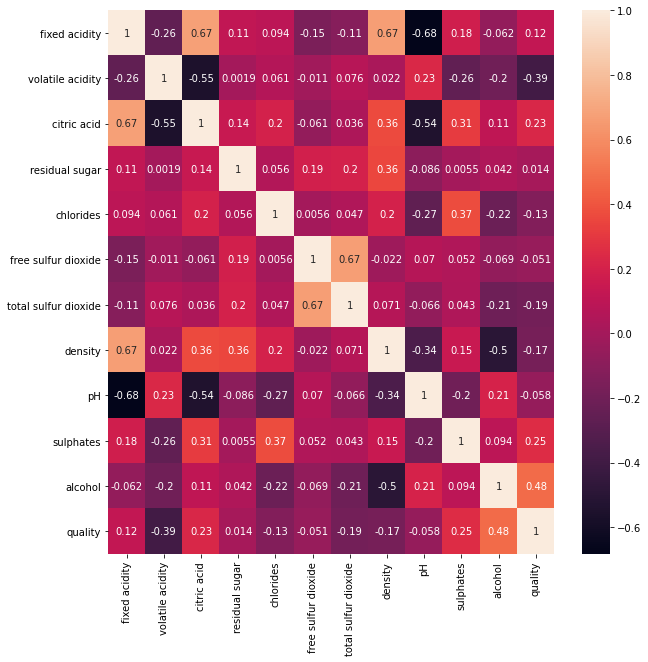

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)

here we are converting quality column (ranging from 1 to 10 ) to 1's and 0's

In [ ]:
bins=[2,6.5,8]
df_train['quality']=pd.cut(df_train['quality'],bins,labels=['bad','good'])


In [ ]:
ohc=LabelEncoder()
df_train['quality']=ohc.fit_transform(df_train['quality'])

In [ ]:
x=df_train.drop('quality',axis=1)
y=df_train['quality']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

In [ ]:
pipe_1=Pipeline(steps=[('model1',RandomForestClassifier())])
pipe_2=Pipeline(steps=[('model2',SGDClassifier(penalty='l1'))])
pipe_3=Pipeline(steps=[('model3',SVC())])

In [ ]:
pipe=[pipe_1,pipe_2,pipe_3]
model=['RandomForestClassifier','SGDClassifier','SVc']
score={}
for i in range(len(pipe)):
    pipe[i].fit(xtrain,ytrain)
    pred=pipe[i].predict(xtest)
    acc=accuracy_score(ytest,pred)
    score[model[i]]=acc

In [ ]:
score

{'RandomForestClassifier': 0.89375, 'SGDClassifier': 0.8625, 'SVc': 0.84375}

In [ ]:
rfc_eval = cross_val_score(pipe_1, X = xtrain, y = ytrain, cv = 20)
rfc_eval.mean()

0.9155505952380952